# Topics

#### Imports

In [1]:
import json

from transformers import pipeline, logging
import pandas as pd
from kilroyplot.plot import plt

#### Configuration

In [2]:
model = "cardiffnlp/tweet-topic-latest-single"
batch_size = 256

#### Data

In [3]:
def load_data(path):
    return pd.read_json(path, lines=True)["content"]

In [4]:
def load_model(model, batch_size):
    current_level = logging.get_verbosity()
    logging.set_verbosity_error()
    pipe = pipeline(model=model, batch_size=batch_size, top_k=None)
    logging.set_verbosity(current_level)
    return pipe

In [5]:
def score(data, model):
    all_scores = model(data.values.tolist())
    return pd.DataFrame(
        [
            pd.Series({s["label"]: s["score"] for s in scores})
            for scores in all_scores
        ]
    )

In [6]:
def score_data(path, model):
    data = load_data(path)
    return score(data, model)

In [7]:
model = load_model(model, batch_size)

In [8]:
before = score_data("before.jsonl", model)
after = score_data("after.jsonl", model)

#### Results

In [9]:
def get_topic_label(topic):
    return topic.replace("_", " ").capitalize()

In [10]:
def plot_topics(
    i,
    n,
    data,
    label,
    x_label="Score",
    y_label="Topic",
    fmt_topic=get_topic_label,
):
    height = 1 / (n + 2)
    scores = data.mean()
    bars_pos = [j - i * height for j in range(len(scores))]
    ticks_pos = [j - ((n - 1) / 2) * height for j in range(len(scores))]
    ticks = [fmt_topic(topic) for topic in scores.index]

    p = plt.barh(bars_pos, scores, height=height, label=label)
    plt.yticks(ticks_pos, ticks)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

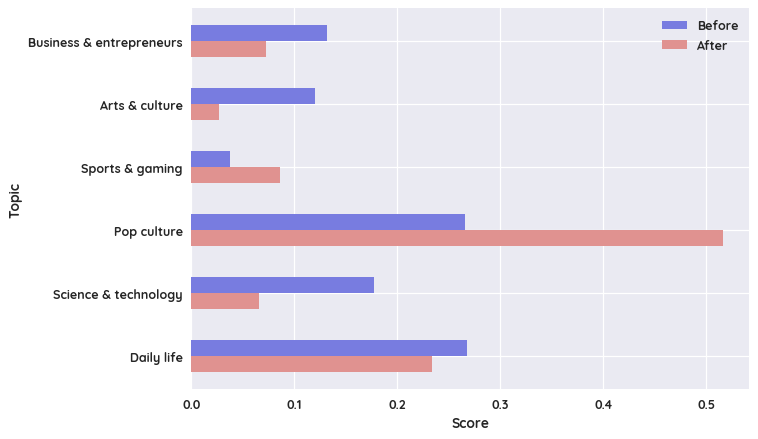

In [11]:
plot_topics(0, 2, before, "Before")
plot_topics(1, 2, after, "After")